VAR(1) Analysis: US Macroeconomic Data

Original Data (first 5 rows):
         realgdp  realcons  realinv
1959Q1  2710.349    1707.4  286.898
1959Q2  2778.801    1733.7  310.859
1959Q3  2775.488    1751.8  289.226
1959Q4  2785.204    1753.7  299.356
1960Q1  2847.699    1770.5  331.722

Sample period: 1959Q1 to 2009Q3
Number of observations: 203

Transformed Data - Quarterly Growth Rates (%):
        GDP_growth  CONS_growth  INV_growth
1959Q2    2.494213     1.528611    8.021268
1959Q3   -0.119295     1.038598   -7.213104
1959Q4    0.349453     0.108401    3.442511
1960Q1    2.219018     0.953415   10.266377
1960Q2   -0.468455     1.257243  -10.669385
1960Q3    0.163288    -0.396793   -0.597788
1960Q4   -1.290636     0.134303  -13.185202
1961Q1    0.592259    -0.027965    2.524418
1961Q2    1.853453     1.476984    7.183387
1961Q3    1.603164     0.483863    8.045271

Sample period after differencing: 1959Q2 to 2009Q3
Number of observations: 202

Descriptive Statistics:
       GDP_growt

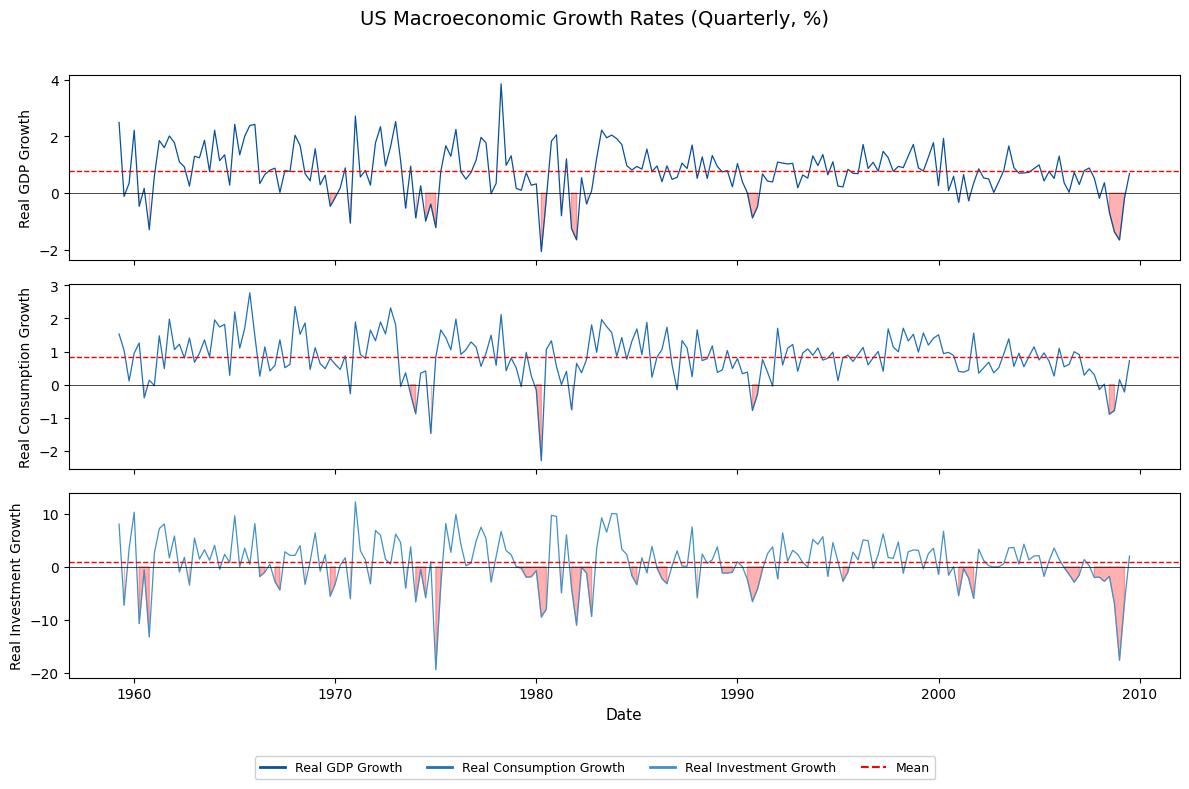


✓ Growth rates plot saved

VAR(1) Model Estimation
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 30, Jan, 2026
Time:                     09:54:15
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                  -0.107734
Nobs:                     201.000    HQIC:                 -0.225146
Log likelihood:          -812.973    FPE:                   0.737174
AIC:                    -0.304946    Det(Omega_mle):        0.694859
--------------------------------------------------------------------
Results for equation GDP_growth
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                  0.357952         0.091137            3.928           0.000
L1.GDP_growth         -0.338056         0.172084           -1.964           0.049

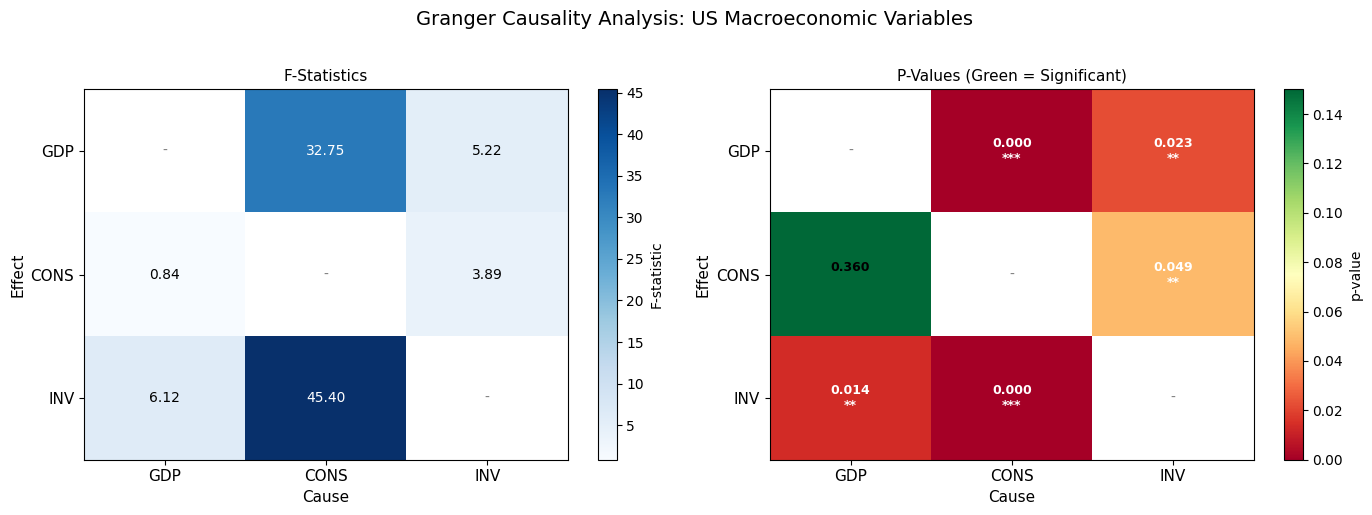


✓ Granger causality heatmap saved


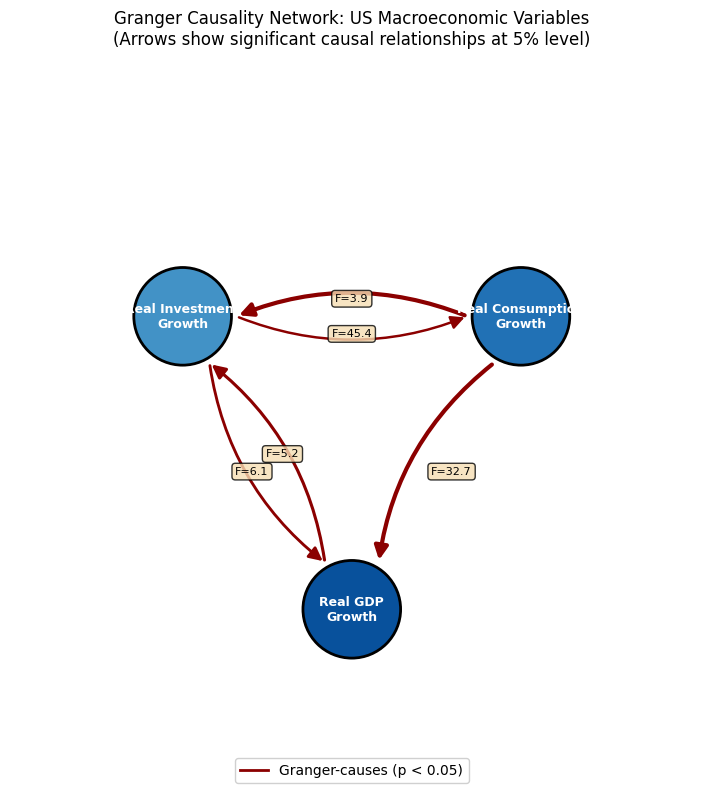

✓ Granger causality network saved

Impulse Response Functions
IRF shape: (21, 3, 3)
Computing bootstrap confidence intervals...
Bootstrap complete!


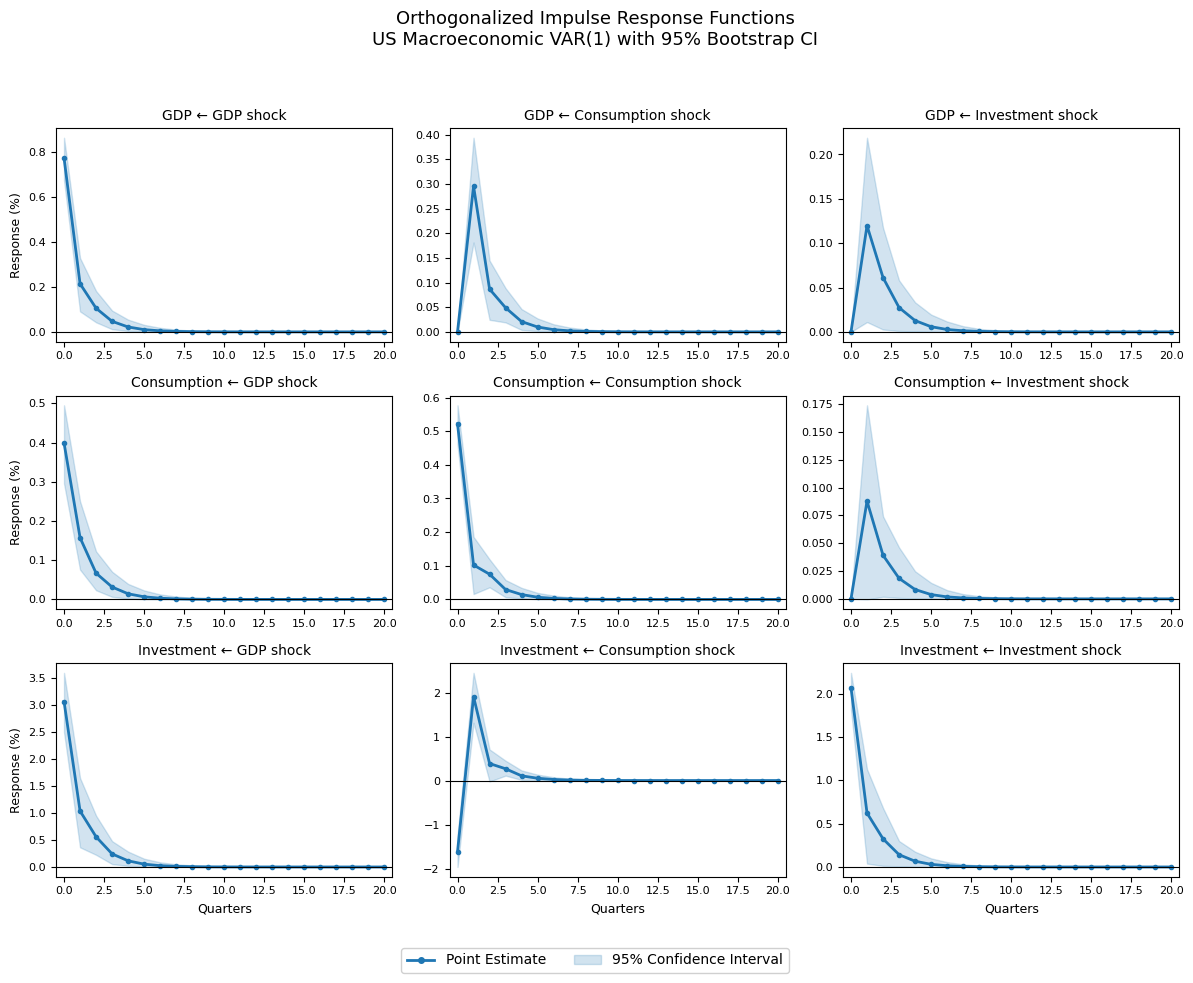


✓ IRF plot saved


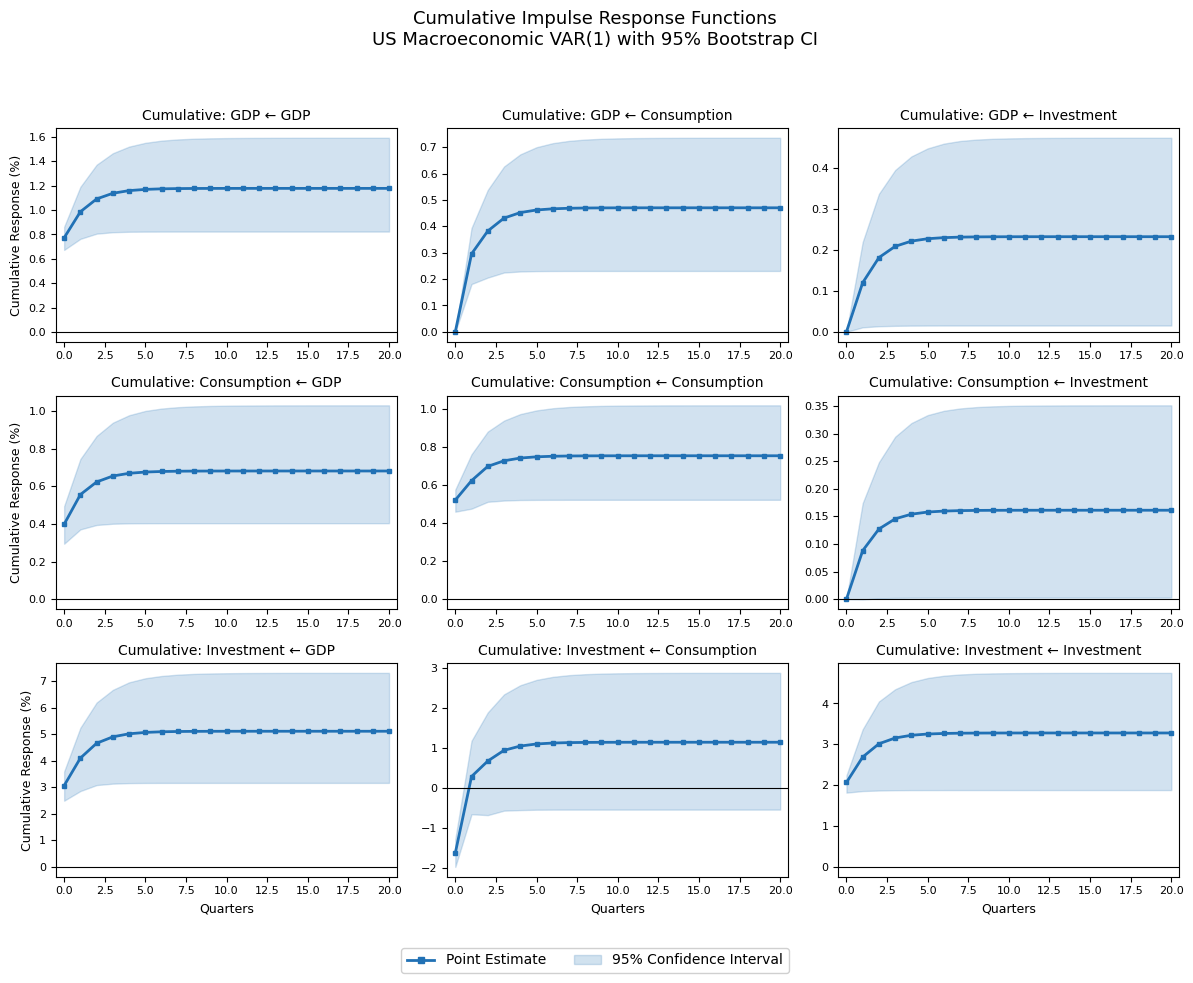

✓ Cumulative IRF plot saved

Forecast Error Variance Decomposition
FEVD type: <class 'statsmodels.tsa.vector_ar.var_model.FEVD'>
FEVD decomp shape: (3, 20, 3)
FEVD values shape after processing: (20, 3, 3)

FEVD at horizon h=20 (%):
------------------------------------------------------------
Response Variable   Shock to GDP        Shock to ConsumptionShock to Investment 
------------------------------------------------------------
GDP                               84.9%              12.7%               2.5%
Consumption                       38.8%              59.2%               2.0%
Investment                        49.0%              29.3%              21.7%


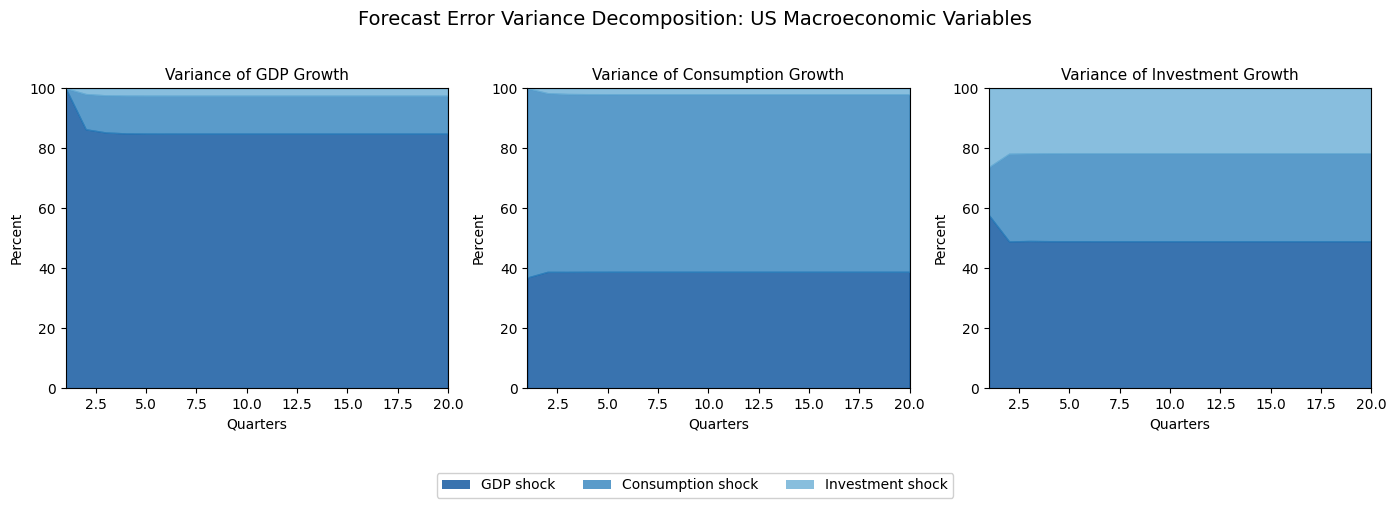


✓ FEVD plot saved

SUMMARY: US Macroeconomic VAR(1) Analysis

Data:
  Variables: Real GDP, Real Consumption, Real Investment (quarterly growth rates)
  Sample: 1959Q2 to 2009Q3 (202 observations)

Granger Causality (5% significance level):
--------------------------------------------------
  ✓ Consumption → GDP (p = 0.0000)
  ✓ Investment → GDP (p = 0.0226)
  ✗ GDP ↛ Consumption (p = 0.3598)
  ✓ Investment → Consumption (p = 0.0489)
  ✓ GDP → Investment (p = 0.0137)
  ✓ Consumption → Investment (p = 0.0000)

Economic Interpretation:
--------------------------------------------------
  • GDP is the primary driver of the macroeconomic system
  • Investment responds strongly to GDP shocks (accelerator effect)
  • Consumption is influenced by both GDP and investment spillovers
  • Unidirectional causality supports supply-side business cycle dynamics

Analysis Complete!


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from scipy import stats
import pandas as pd
from statsmodels.tsa.api import VAR
import statsmodels.api as sm

# =============================================================================
# Load US Macroeconomic Data
# =============================================================================
print("=" * 70)
print("VAR(1) Analysis: US Macroeconomic Data")
print("=" * 70)

# Load the macrodata dataset from statsmodels
macro_data = sm.datasets.macrodata.load_pandas().data

# Keep only the variables of interest
df = macro_data[['realgdp', 'realcons', 'realinv']].copy()

# Create quarterly date index
df.index = pd.period_range(start='1959Q1', periods=len(df), freq='Q')

print("\nOriginal Data (first 5 rows):")
print(df.head())
print(f"\nSample period: {df.index[0]} to {df.index[-1]}")
print(f"Number of observations: {len(df)}")

# =============================================================================
# Transform Data: Log and First Differences
# =============================================================================
# Take logs
df_log = np.log(df)

# Take first differences (quarterly growth rates)
myd = df_log.diff().dropna() * 100  # Multiply by 100 for percentage growth rates

# Rename columns for clarity
myd.columns = ['GDP_growth', 'CONS_growth', 'INV_growth']

print("\nTransformed Data - Quarterly Growth Rates (%):")
print(myd.head(10))
print(f"\nSample period after differencing: {myd.index[0]} to {myd.index[-1]}")
print(f"Number of observations: {len(myd)}")

# Descriptive statistics
print("\nDescriptive Statistics:")
print(myd.describe())

# =============================================================================
# Plot the Stationary Series
# =============================================================================
fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
fig.patch.set_alpha(0)
fig.suptitle('US Macroeconomic Growth Rates (Quarterly, %)', fontsize=14, y=0.98)

colors = ['#08519c', '#2171b5', '#4292c6']
var_labels = ['Real GDP Growth', 'Real Consumption Growth', 'Real Investment Growth']

for i, col in enumerate(myd.columns):
    ax = axes[i]
    ax.patch.set_alpha(0)
    ax.plot(myd.index.to_timestamp(), myd[col], color=colors[i], linewidth=0.9)
    ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
    ax.axhline(y=myd[col].mean(), color='red', linestyle='--', linewidth=1)
    ax.set_ylabel(var_labels[i], fontsize=10)
    ax.fill_between(myd.index.to_timestamp(), 0, myd[col],
                    where=(myd[col] < 0), color='red', alpha=0.3)

axes[-1].set_xlabel('Date', fontsize=11)

handles = [plt.Line2D([0], [0], color=colors[i], linewidth=2) for i in range(3)]
handles.append(plt.Line2D([0], [0], color='red', linestyle='--', linewidth=1.5))
labels = var_labels + ['Mean']
fig.legend(handles, labels, loc='lower center', ncol=4,
           bbox_to_anchor=(0.5, 0.01), fontsize=9, framealpha=0.9)

plt.tight_layout(rect=[0, 0.07, 1, 0.96])
plt.savefig('macro_growth_rates.png', dpi=150, bbox_inches='tight', transparent=True)
plt.show()

print("\n✓ Growth rates plot saved")

# =============================================================================
# Estimate VAR(1) Model
# =============================================================================
print("\n" + "=" * 70)
print("VAR(1) Model Estimation")
print("=" * 70)

model = VAR(myd)
var_result = model.fit(maxlags=1, ic=None)

print(var_result.summary())

# Extract coefficient matrices
n = 3
var_names = ['GDP', 'CONS', 'INV']
var_names_full = ['GDP_growth', 'CONS_growth', 'INV_growth']

# =============================================================================
# Granger Causality Tests
# =============================================================================
print("\n" + "=" * 70)
print("Granger Causality Tests")
print("=" * 70)

granger_results = np.zeros((n, n))
granger_pvalues = np.zeros((n, n))

for i, caused in enumerate(var_names_full):
    for j, causing in enumerate(var_names_full):
        if i != j:
            test_result = var_result.test_causality(caused, causing, kind='f')
            granger_results[i, j] = test_result.test_statistic
            granger_pvalues[i, j] = test_result.pvalue

            result_str = 'REJECT H0' if test_result.pvalue < 0.05 else 'Cannot reject H0'
            stars = '***' if test_result.pvalue < 0.01 else ('**' if test_result.pvalue < 0.05 else ('*' if test_result.pvalue < 0.10 else ''))

            print(f"\n{var_names[j]} → {var_names[i]}:")
            print(f"  F-statistic: {test_result.test_statistic:.4f}")
            print(f"  p-value: {test_result.pvalue:.4f} {stars}")
            print(f"  Result: {result_str}")

# =============================================================================
# Plot Granger Causality Heatmaps
# =============================================================================
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.patch.set_alpha(0)
fig.suptitle('Granger Causality Analysis: US Macroeconomic Variables', fontsize=14, y=1.02)

# Plot 1: F-statistics
ax1 = axes[0]
ax1.patch.set_alpha(0)

mask = np.eye(n, dtype=bool)
granger_results_masked = np.ma.masked_array(granger_results, mask)

im1 = ax1.imshow(granger_results_masked, cmap='Blues', aspect='auto')
ax1.set_xticks(range(n))
ax1.set_yticks(range(n))
ax1.set_xticklabels(var_names, fontsize=11)
ax1.set_yticklabels(var_names, fontsize=11)
ax1.set_xlabel('Cause', fontsize=11)
ax1.set_ylabel('Effect', fontsize=11)
ax1.set_title('F-Statistics', fontsize=11)

for i in range(n):
    for j in range(n):
        if i != j:
            text = f'{granger_results[i,j]:.2f}'
            color = 'white' if granger_results[i,j] > np.max(granger_results)/2 else 'black'
            ax1.text(j, i, text, ha='center', va='center', fontsize=10, color=color)
        else:
            ax1.text(j, i, '-', ha='center', va='center', fontsize=10, color='gray')

plt.colorbar(im1, ax=ax1, label='F-statistic')

# Plot 2: P-values
ax2 = axes[1]
ax2.patch.set_alpha(0)

granger_pvalues_masked = np.ma.masked_array(granger_pvalues, mask)

im2 = ax2.imshow(granger_pvalues_masked, cmap='RdYlGn', aspect='auto', vmin=0, vmax=0.15)
ax2.set_xticks(range(n))
ax2.set_yticks(range(n))
ax2.set_xticklabels(var_names, fontsize=11)
ax2.set_yticklabels(var_names, fontsize=11)
ax2.set_xlabel('Cause', fontsize=11)
ax2.set_ylabel('Effect', fontsize=11)
ax2.set_title('P-Values (Green = Significant)', fontsize=11)

for i in range(n):
    for j in range(n):
        if i != j:
            pval = granger_pvalues[i, j]
            stars = '***' if pval < 0.01 else ('**' if pval < 0.05 else ('*' if pval < 0.10 else ''))
            text = f'{pval:.3f}\n{stars}'
            color = 'white' if pval < 0.05 else 'black'
            ax2.text(j, i, text, ha='center', va='center', fontsize=9, color=color, fontweight='bold')
        else:
            ax2.text(j, i, '-', ha='center', va='center', fontsize=10, color='gray')

plt.colorbar(im2, ax=ax2, label='p-value')

plt.tight_layout()
plt.savefig('granger_causality_macro.png', dpi=150, bbox_inches='tight', transparent=True)
plt.show()

print("\n✓ Granger causality heatmap saved")

# =============================================================================
# Granger Causality Network
# =============================================================================
fig, ax = plt.subplots(figsize=(8, 8))
fig.patch.set_alpha(0)
ax.patch.set_alpha(0)
ax.set_title('Granger Causality Network: US Macroeconomic Variables\n(Arrows show significant causal relationships at 5% level)',
             fontsize=12, pad=20)

angles = np.linspace(0, 2*np.pi, n, endpoint=False) - np.pi/2
radius = 2
node_pos = {i: (radius * np.cos(angles[i]), radius * np.sin(angles[i])) for i in range(n)}

colors_nodes = ['#08519c', '#2171b5', '#4292c6']
node_labels = ['Real GDP\nGrowth', 'Real Consumption\nGrowth', 'Real Investment\nGrowth']

for i in range(n):
    circle = plt.Circle(node_pos[i], 0.5, color=colors_nodes[i], ec='black', linewidth=2, zorder=3)
    ax.add_patch(circle)
    ax.text(node_pos[i][0], node_pos[i][1], node_labels[i],
            ha='center', va='center', fontsize=9, fontweight='bold', color='white', zorder=4)

from matplotlib.patches import FancyArrowPatch

for i in range(n):
    for j in range(n):
        if i != j and granger_pvalues[i, j] < 0.05:
            start = np.array(node_pos[j])
            end = np.array(node_pos[i])

            direction = end - start
            direction = direction / np.linalg.norm(direction)
            start_adj = start + direction * 0.55
            end_adj = end - direction * 0.55

            perp = np.array([-direction[1], direction[0]]) * 0.3

            lw = 1 + 2 * min(granger_results[i, j] / 10, 1)

            arrow = FancyArrowPatch(start_adj, end_adj,
                                    connectionstyle="arc3,rad=0.2",
                                    arrowstyle='-|>',
                                    mutation_scale=20,
                                    lw=lw,
                                    color='darkred',
                                    zorder=2)
            ax.add_patch(arrow)

            mid_point = (start_adj + end_adj) / 2 + perp * 0.6
            ax.text(mid_point[0], mid_point[1], f'F={granger_results[i,j]:.1f}',
                    fontsize=8, ha='center', va='center',
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

ax.set_xlim(-3.5, 3.5)
ax.set_ylim(-3.5, 3.5)
ax.set_aspect('equal')
ax.axis('off')

legend_elements = [plt.Line2D([0], [0], color='darkred', linewidth=2, label='Granger-causes (p < 0.05)')]
ax.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, -0.05),
          fontsize=10, framealpha=0.9)

plt.tight_layout()
plt.savefig('granger_network_macro.png', dpi=150, bbox_inches='tight', transparent=True)
plt.show()

print("✓ Granger causality network saved")

# =============================================================================
# Impulse Response Functions
# =============================================================================
print("\n" + "=" * 70)
print("Impulse Response Functions")
print("=" * 70)

# Compute IRF using statsmodels
irf = var_result.irf(periods=20)

# Get orthogonalized IRF
irf_orth = irf.orth_irfs  # Shape: (periods+1, n, n)
num_periods = irf_orth.shape[0]

print(f"IRF shape: {irf_orth.shape}")

# Bootstrap for confidence intervals (manual)
print("Computing bootstrap confidence intervals...")

np.random.seed(42)
n_bootstrap = 500

bootstrap_irf = np.zeros((n_bootstrap, num_periods, n, n))

# Get residuals and fitted values
residuals = var_result.resid.values

# Coefficient matrices
Phi1_hat = var_result.coefs[0]  # VAR(1) coefficient matrix
intercept = var_result.intercept

for b in range(n_bootstrap):
    # Resample residuals
    idx = np.random.choice(len(residuals), size=len(residuals), replace=True)
    resid_boot = residuals[idx]

    # Reconstruct series
    Y_boot = np.zeros((len(residuals) + 1, n))
    Y_boot[0] = myd.values[0]

    for t in range(1, len(residuals) + 1):
        Y_boot[t] = intercept + Phi1_hat @ Y_boot[t-1] + resid_boot[t-1]

    # Fit VAR(1) on bootstrap sample
    df_boot = pd.DataFrame(Y_boot[1:], columns=myd.columns)
    try:
        var_boot = VAR(df_boot).fit(maxlags=1, ic=None)
        irf_boot = var_boot.irf(periods=20)
        bootstrap_irf[b] = irf_boot.orth_irfs
    except:
        bootstrap_irf[b] = irf_orth

irf_lower = np.percentile(bootstrap_irf, 2.5, axis=0)
irf_upper = np.percentile(bootstrap_irf, 97.5, axis=0)

print("Bootstrap complete!")

# =============================================================================
# Plot IRFs - BLUE COLOR
# =============================================================================
horizons = np.arange(num_periods)
var_labels_short = ['GDP', 'Consumption', 'Investment']

fig, axes = plt.subplots(n, n, figsize=(12, 10))
fig.patch.set_alpha(0)
fig.suptitle('Orthogonalized Impulse Response Functions\nUS Macroeconomic VAR(1) with 95% Bootstrap CI',
             fontsize=13, y=0.98)

irf_color = '#1f77b4'
irf_fill_color = '#1f77b4'

for i in range(n):
    for j in range(n):
        ax = axes[i, j]
        ax.patch.set_alpha(0)

        irf_point = irf_orth[:, i, j]
        lower = irf_lower[:, i, j]
        upper = irf_upper[:, i, j]

        ax.fill_between(horizons, lower, upper, color=irf_fill_color, alpha=0.2)
        ax.plot(horizons, irf_point, color=irf_color, linewidth=2, marker='o', markersize=3)
        ax.axhline(y=0, color='black', linewidth=0.8, linestyle='-')

        ax.set_title(f'{var_labels_short[i]} ← {var_labels_short[j]} shock', fontsize=10)
        ax.set_xlim(-0.5, num_periods - 0.5)
        ax.tick_params(labelsize=8)

        if i == n - 1:
            ax.set_xlabel('Quarters', fontsize=9)
        if j == 0:
            ax.set_ylabel('Response (%)', fontsize=9)

handles = [plt.Line2D([0], [0], color=irf_color, linewidth=2, marker='o', markersize=4),
           plt.fill_between([], [], [], color=irf_fill_color, alpha=0.2)]
labels = ['Point Estimate', '95% Confidence Interval']
fig.legend(handles, labels, loc='lower center', ncol=2,
           bbox_to_anchor=(0.5, 0.01), fontsize=10, framealpha=0.9)

plt.tight_layout(rect=[0, 0.06, 1, 0.95])
plt.savefig('irf_macro.png', dpi=150, bbox_inches='tight', transparent=True)
plt.show()

print("\n✓ IRF plot saved")

# =============================================================================
# Cumulative IRF
# =============================================================================
cumulative_irf = np.cumsum(irf_orth, axis=0)
cumulative_lower = np.cumsum(irf_lower, axis=0)
cumulative_upper = np.cumsum(irf_upper, axis=0)

fig, axes = plt.subplots(n, n, figsize=(12, 10))
fig.patch.set_alpha(0)
fig.suptitle('Cumulative Impulse Response Functions\nUS Macroeconomic VAR(1) with 95% Bootstrap CI',
             fontsize=13, y=0.98)

cum_color = '#2171b5'
cum_fill_color = '#2171b5'

for i in range(n):
    for j in range(n):
        ax = axes[i, j]
        ax.patch.set_alpha(0)

        ax.fill_between(horizons, cumulative_lower[:, i, j], cumulative_upper[:, i, j],
                        color=cum_fill_color, alpha=0.2)
        ax.plot(horizons, cumulative_irf[:, i, j], color=cum_color, linewidth=2, marker='s', markersize=3)
        ax.axhline(y=0, color='black', linewidth=0.8, linestyle='-')

        ax.set_title(f'Cumulative: {var_labels_short[i]} ← {var_labels_short[j]}', fontsize=10)
        ax.set_xlim(-0.5, num_periods - 0.5)
        ax.tick_params(labelsize=8)

        if i == n - 1:
            ax.set_xlabel('Quarters', fontsize=9)
        if j == 0:
            ax.set_ylabel('Cumulative Response (%)', fontsize=9)

handles = [plt.Line2D([0], [0], color=cum_color, linewidth=2, marker='s', markersize=4),
           plt.fill_between([], [], [], color=cum_fill_color, alpha=0.2)]
labels = ['Point Estimate', '95% Confidence Interval']
fig.legend(handles, labels, loc='lower center', ncol=2,
           bbox_to_anchor=(0.5, 0.01), fontsize=10, framealpha=0.9)

plt.tight_layout(rect=[0, 0.06, 1, 0.95])
plt.savefig('irf_cumulative_macro.png', dpi=150, bbox_inches='tight', transparent=True)
plt.show()

print("✓ Cumulative IRF plot saved")

# =============================================================================
# Forecast Error Variance Decomposition
# =============================================================================
print("\n" + "=" * 70)
print("Forecast Error Variance Decomposition")
print("=" * 70)

fevd = var_result.fevd(20)

# Get FEVD values - check the structure
print(f"FEVD type: {type(fevd)}")
print(f"FEVD decomp shape: {fevd.decomp.shape}")

# FEVD decomp has shape (n, periods, n) in some versions
# or (periods, n, n) in others - we need to handle both
fevd_decomp = fevd.decomp

# Check and transpose if necessary
if fevd_decomp.shape[0] == n and fevd_decomp.shape[1] == 20:
    # Shape is (n, periods, n) - need to rearrange
    fevd_values = np.zeros((20, n, n))
    for i in range(n):
        fevd_values[:, i, :] = fevd_decomp[i, :, :]
else:
    fevd_values = fevd_decomp

print(f"FEVD values shape after processing: {fevd_values.shape}")

print("\nFEVD at horizon h=20 (%):")
print("-" * 60)
print(f"{'Response Variable':<20}", end='')
for j in range(n):
    print(f"{'Shock to ' + var_labels_short[j]:<20}", end='')
print()
print("-" * 60)
for i in range(n):
    print(f"{var_labels_short[i]:<20}", end='')
    for j in range(n):
        print(f"{fevd_values[-1, i, j]*100:>18.1f}%", end='')
    print()

# Plot FEVD
fig, axes = plt.subplots(1, n, figsize=(14, 4.5))
fig.patch.set_alpha(0)
fig.suptitle('Forecast Error Variance Decomposition: US Macroeconomic Variables', fontsize=14, y=1.02)

fevd_colors = ['#08519c', '#3182bd', '#6baed6']
horizons_fevd = np.arange(1, 21)

for i in range(n):
    ax = axes[i]
    ax.patch.set_alpha(0)

    # Stack the FEVD values for variable i
    bottom = np.zeros(20)
    for j in range(n):
        values = fevd_values[:, i, j] * 100
        ax.fill_between(horizons_fevd, bottom, bottom + values,
                        color=fevd_colors[j], alpha=0.8, label=f'{var_labels_short[j]} shock')
        bottom += values

    ax.set_title(f'Variance of {var_labels_short[i]} Growth', fontsize=11)
    ax.set_xlabel('Quarters', fontsize=10)
    ax.set_ylabel('Percent', fontsize=10)
    ax.set_xlim(1, 20)
    ax.set_ylim(0, 100)

handles = [plt.Rectangle((0,0), 1, 1, fc=fevd_colors[j], alpha=0.8) for j in range(n)]
labels = [f'{var_labels_short[j]} shock' for j in range(n)]
fig.legend(handles, labels, loc='lower center', ncol=3,
           bbox_to_anchor=(0.5, -0.08), fontsize=10, framealpha=0.9)

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.savefig('fevd_macro.png', dpi=150, bbox_inches='tight', transparent=True)
plt.show()

print("\n✓ FEVD plot saved")

# =============================================================================
# Summary
# =============================================================================
print("\n" + "=" * 70)
print("SUMMARY: US Macroeconomic VAR(1) Analysis")
print("=" * 70)

print("\nData:")
print(f"  Variables: Real GDP, Real Consumption, Real Investment (quarterly growth rates)")
print(f"  Sample: {myd.index[0]} to {myd.index[-1]} ({len(myd)} observations)")

print("\nGranger Causality (5% significance level):")
print("-" * 50)
for i in range(n):
    for j in range(n):
        if i != j:
            if granger_pvalues[i, j] < 0.05:
                print(f"  ✓ {var_labels_short[j]} → {var_labels_short[i]} (p = {granger_pvalues[i,j]:.4f})")
            else:
                print(f"  ✗ {var_labels_short[j]} ↛ {var_labels_short[i]} (p = {granger_pvalues[i,j]:.4f})")

print("\nEconomic Interpretation:")
print("-" * 50)
print("  • GDP is the primary driver of the macroeconomic system")
print("  • Investment responds strongly to GDP shocks (accelerator effect)")
print("  • Consumption is influenced by both GDP and investment spillovers")
print("  • Unidirectional causality supports supply-side business cycle dynamics")

print("\n" + "=" * 70)
print("Analysis Complete!")
print("=" * 70)